This workbook is a preliminary form of deployment for the project.  The notebook is built in a way for a user to go through the following steps:
- Input a latitude and longitude of a given location.  
    - If you're stuck on finding lat and lon, you can use Google Maps [here](https://www.google.com/maps)
    - Clicking on any point will show you the latitude and longitude
- Load the pre-trained convolutional neural network model
- Run an API call to load and display an image of the location referenced
- Run the image through the neural network and record and display the results

If all goes well, the model should give the user a good idea of whether or not that location is at risk of a wildfire.

If you have trouble finding a good spot on the map to test the model on, feel free to use these spots on the map from California that recently experienced wildfires.  As this occurred in California, it is well outside of the training or validation set, and as such, should be a good measure for how the model performs.  The model should indicate that these areas are at high risk of a wildfire.
- 37.882, -119.643
- 40.53927, -122.56656
- 34.244649, -117.964838

Please feel free to look up locations of wildfires and test it out further, though!

# Import Libraries:

In [29]:
import pandas as pd
import numpy as np

import requests
from IPython.display import Image, display

import urllib.request

import warnings
warnings.filterwarnings('ignore')

# Input Lat and Lon:

In [35]:
lat = input('Please enter a latitude: ')
lon = input('Please enter a longitude: ')
center = lat + ',' + lon

Please enter a latitude: 34.244649
Please enter a longitude: -117.96483


# Pull Image:

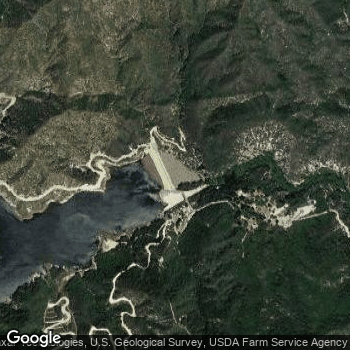

In [36]:
# Importing the Key:
key = open('/Users/Thomas/Desktop/capstone/google_api/gmap_api_key.txt', 'r').read()

img_size = '350x350' # Let's try this for now.  Gets multiplied by scale for resolution
# 350x350 seems to be about the minimum for image resolution
# ~100kb each, 20k images, 2 gigs for the batch, wf and nwf

img_format = 'jpg' # For compressability (is that a word?) png is 'png8' for 8 bit and 'png32' for 32 bit

map_scale = '1' # For scale parameter. 

maptype = 'satellite' # Obvious reason

zoom = '15' # try that to start

# Chopping the URL into manageable pieces 

a = 'https://maps.googleapis.com/maps/api/staticmap?' # Base
b = 'center=' # Center 
# Enter Center
c = '&zoom=' # Zoom
# Enter Zoom
d = '&maptype=satellite' # Map type 
# No need to enter maptype - just keep satellite default
e = '&size=' # Image Size
# Enter image size
f = '&key='
# Enter key

# Creating the URL:
url1 = a + b
url2 = c + zoom + d + e + img_size + f + key
# URL = url1 + row['center'] + url2

# Showing the Image:
url = url1 + center + url2
r = requests.get(url)
display(Image(r.content))

## Run Through CNN:

In [28]:
# Deploy once model is trained. . . 
# model = keras.models.load_model('cnn_model.h5')
# model.predict(image) # (will need to transform first)

## Display Results:

# Conclusion: